In [19]:
!pip install pandas openpyxl
!pip install pandas xlrd

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 2.7 MB/s eta 0:00:00


In [352]:
import pandas as pd

# Read the .xls file into a DataFrame
GalileeED = pd.read_excel('Galileeenvironmentaldata.xls', engine='xlrd')

In [353]:
GalileeED.head()

,OID_,POINT_X,POINT_Y,chalk_dist,aspect,land_carvature,slope,spring_dist,valley_floor_dist_100,agricalture_dist_100,grazing_dist,Unnamed: 11,Israel TM grid
0,1,222803.8589,767342.9006,412.310577,26.010315,7.304180,2.913352,2220.360352,600.000000,1523.154663,100.000000,NaN,NaN
1,2,222903.8589,767342.9006,316.227753,14.640529,8.138262,4.160867,2140.093506,608.276245,1486.606934,100.000000,NaN,NaN
2,3,223003.8589,767342.9006,223.606796,13.397427,10.292383,3.791428,2061.552734,632.455505,1414.213623,100.000000,NaN,NaN
3,4,223103.8589,767342.9006,141.421356,13.555563,-0.059512,1.201708,1984.943359,670.820373,1345.362427,100.000000,NaN,NaN
4,5,223203.8589,767342.9006,100.000000,215.033554,5.270527,1.349439,1910.497314,721.110229,1280.624878,141.421356,NaN,NaN


In [356]:
import pandas as pd

# Read the Excel file into a DataFrame
Galilee_sites = pd.read_excel('Galilee_Sites.xlsx', engine='openpyxl')
Galilee_sites.head()

,X_ITM,Y_ITM,Unnamed: 2,"Bronze and Iron Age sites in the Upper Galilee, Israel"
0,242900,775600,NaN,Israel TM grid
1,238477,770700,NaN,NaN
2,231300,775400,NaN,NaN
3,231500,771800,NaN,NaN
4,231600,763600,NaN,NaN


In [358]:
GalileeED['POINT_X'] = GalileeED['POINT_X'].astype(int)
GalileeED['POINT_Y'] = GalileeED['POINT_Y'].astype(int)
Galilee_sites['X_ITM'] = Galilee_sites['X_ITM'].astype(int)
Galilee_sites['Y_ITM'] = Galilee_sites['Y_ITM'].astype(int)

In [360]:
import numpy as np
def check_any_distance(point_x, point_y, df1):
    # Calculate distances from this point to all points in df1
    distances = np.sqrt((df1['X_ITM'] - point_x)**2 + (df1['Y_ITM'] - point_y)**2)
    # If any distance is less than 100, return 1, otherwise 0
    return int((distances < 1000).any())

# Apply the logic across all rows in df2
GalileeED['match'] = GalileeED.apply(lambda row: check_any_distance(row['POINT_X'], row['POINT_Y'], Galilee_sites), axis=1)
GalileeED.head()

,OID_,POINT_X,POINT_Y,chalk_dist,aspect,land_carvature,slope,spring_dist,valley_floor_dist_100,agricalture_dist_100,grazing_dist,Unnamed: 11,Israel TM grid,match
0,1,222803,767342,412.310577,26.010315,7.304180,2.913352,2220.360352,600.000000,1523.154663,100.000000,NaN,NaN,0
1,2,222903,767342,316.227753,14.640529,8.138262,4.160867,2140.093506,608.276245,1486.606934,100.000000,NaN,NaN,0
2,3,223003,767342,223.606796,13.397427,10.292383,3.791428,2061.552734,632.455505,1414.213623,100.000000,NaN,NaN,0
3,4,223103,767342,141.421356,13.555563,-0.059512,1.201708,1984.943359,670.820373,1345.362427,100.000000,NaN,NaN,0
4,5,223203,767342,100.000000,215.033554,5.270527,1.349439,1910.497314,721.110229,1280.624878,141.421356,NaN,NaN,0


In [361]:
# Count how many values in the 'match' column are 1
count_ones = GalileeED['match'].sum()

print(f"Number of rows with match == 1: {count_ones}")


Number of rows with match == 1: 12217


In [364]:
GalileeED.drop(columns=['Unnamed: 11', 'OID_','Israel TM grid', ], inplace=True)

In [366]:
GalileeED.head()

,POINT_X,POINT_Y,chalk_dist,aspect,land_carvature,slope,spring_dist,valley_floor_dist_100,agricalture_dist_100,grazing_dist,match
0,222803,767342,412.310577,26.010315,7.304180,2.913352,2220.360352,600.000000,1523.154663,100.000000,0
1,222903,767342,316.227753,14.640529,8.138262,4.160867,2140.093506,608.276245,1486.606934,100.000000,0
2,223003,767342,223.606796,13.397427,10.292383,3.791428,2061.552734,632.455505,1414.213623,100.000000,0
3,223103,767342,141.421356,13.555563,-0.059512,1.201708,1984.943359,670.820373,1345.362427,100.000000,0
4,223203,767342,100.000000,215.033554,5.270527,1.349439,1910.497314,721.110229,1280.624878,141.421356,0


In [368]:
GalileeED.drop(columns=['POINT_X', 'POINT_Y'], inplace=True)

In [370]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [372]:
X=GalileeED.drop(columns=['match'])
y=GalileeED['match']

In [374]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [414]:
model = LogisticRegression(class_weight={0: 1, 1: 3},max_iter=100)
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', model)
])

In [416]:
from imblearn.under_sampling import RandomUnderSampler

# Initialize the undersampler
rus = RandomUnderSampler(random_state=42)

# Resample the data
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)


print(pd.Series(y_train_resampled).value_counts())


match
0    9768
1    9768
Name: count, dtype: int64


In [418]:
pipeline.fit(X_train_res, y_train_res)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg', LogisticRegression(class_weight={0: 1, 1: 3}))])

In [420]:
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.54      0.64      5130
           1       0.42      0.70      0.53      2449

    accuracy                           0.59      7579
   macro avg       0.61      0.62      0.58      7579
weighted avg       0.67      0.59      0.60      7579



In [392]:
coefficients = pipeline.named_steps['logreg'].coef_[0]  # Get the coefficients for a binary classification (1D array)

# Get feature names
feature_names = X_train.columns  #

In [394]:
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort by the absolute value of the coefficient to identify the most important features
feature_importance['abs_coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='abs_coefficient', ascending=False)

print(feature_importance)

                 Feature  Coefficient  abs_coefficient
4            spring_dist    -1.073168         1.073168
3                  slope    -0.953706         0.953706
2         land_carvature     0.738916         0.738916
0             chalk_dist    -0.457369         0.457369
6   agricalture_dist_100    -0.351803         0.351803
5  valley_floor_dist_100    -0.257346         0.257346
7           grazing_dist     0.024161         0.024161
1                 aspect    -0.007957         0.007957


In [328]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

In [330]:
# Create a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scale data (optional with Decision Trees)
    ('tree', DecisionTreeClassifier(random_state=42, class_weight='balanced'))
])

In [332]:
# Fit the pipeline
pipeline.fit(X_train_resampled, y_train_resampled)

Pipeline(steps=[('scaler', StandardScaler()),
                ('tree',
                 DecisionTreeClassifier(class_weight='balanced',
                                        random_state=42))])

In [334]:
# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:")
print(report)

Accuracy: 0.7454809341601795

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.74      0.80      5130
           1       0.58      0.75      0.66      2449

    accuracy                           0.75      7579
   macro avg       0.72      0.75      0.73      7579
weighted avg       0.77      0.75      0.75      7579



In [340]:
from sklearn.model_selection import GridSearchCV

# Set up hyperparameter grid
param_grid = {
    'tree__max_depth': [3, 5, 10, 15],
    'tree__min_samples_split': [2, 5, 10],
    'tree__min_samples_leaf': [1, 2, 5],
    'tree__criterion': ['gini', 'entropy']
}

# Set up GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train_resampled, y_train_resampled)

# Print best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

Best Parameters: {'tree__criterion': 'gini', 'tree__max_depth': 15, 'tree__min_samples_leaf': 1, 'tree__min_samples_split': 2}
Best Cross-Validation Score: 0.7417591552207032


In [348]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Create the pipeline with scaler and decision tree
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scaling features
    ('tree', DecisionTreeClassifier(random_state=42, class_weight='balanced'))
])

# Define the hyperparameter grid to search
param_grid = {
    'tree__max_depth': [3, 5, 10, 15, 20],
    'tree__min_samples_split': [2, 5, 10],
    'tree__min_samples_leaf': [1, 2, 5],
    'tree__criterion': ['gini', 'entropy']
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    pipeline, 
    param_grid, 
    cv=5, 
    scoring='accuracy',
    n_jobs=-1,  # Use all available CPUs
    verbose=1
)

# Fit GridSearchCV on the training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Print best parameters
print("Best Parameters Found:", grid_search.best_params_)

# Train the Decision Tree with the best parameters on training data
best_pipeline = grid_search.best_estimator_

# Predict using the best pipeline
y_pred = best_pipeline.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:")
print(report)


Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best Parameters Found: {'tree__criterion': 'entropy', 'tree__max_depth': 20, 'tree__min_samples_leaf': 5, 'tree__min_samples_split': 2}
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.75      0.80      5130
           1       0.59      0.74      0.65      2449

    accuracy                           0.75      7579
   macro avg       0.72      0.74      0.73      7579
weighted avg       0.77      0.75      0.75      7579



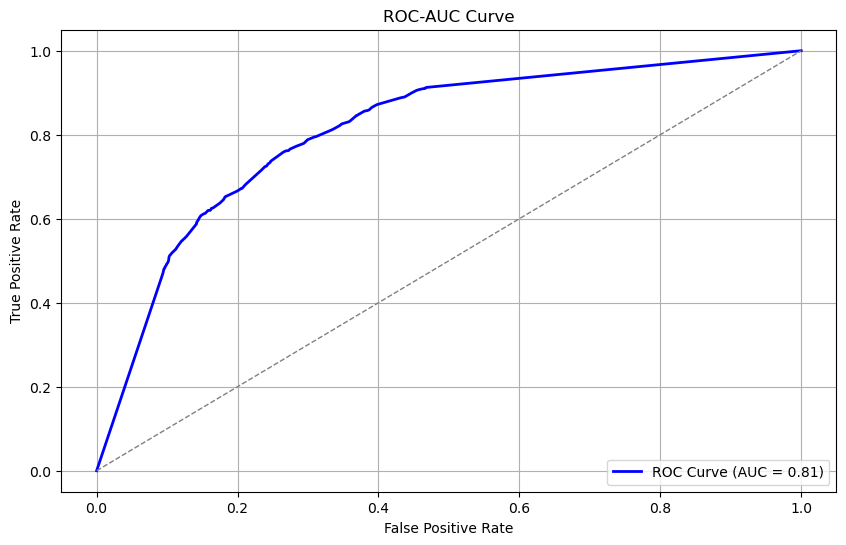

In [412]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
# Predict probabilities on the test set
y_pred_proba = best_pipeline.predict_proba(X_test)[:, 1]  # Probabilities for the positive class (label=1)

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

# Compute AUC score
roc_auc = auc(fpr, tpr)

# Plotting the ROC-AUC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # Diagonal reference line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()